In [2]:
library("caret")

Loading required package: ggplot2

Loading required package: lattice



First we are going to load the dataset into R. 

In [15]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

Next we are going to create a validation dataset, so we can test the accuracy of our model on unseen data. We will splot the loaded dataset into two, 80% to train and 20% to hold back as our validation dataset.

In [16]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

Now we are going to look at the data in a few different ways: dimensions of the dataset, types of the attributes, peek at the data itself, levels of the class attribute, breakdown of the instances in each class, and statisitical summary of all attributes. 

First we are going to look at the dimensions of the dataset.

In [17]:
dim(dataset)

[1] 120   5

Next, we are going to look at the types of attributes

In [18]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

Next we are going to look at the first 5 rows of the data

In [19]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


We are going to look at the level of the class variable

In [20]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

Now we can look at the class distribution, both as a count and a precentage 

In [22]:
percentage <- prop.table(table(dataset$Species))*100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


Now we can take a look at a summary of each attribute

In [23]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.862   Mean   :3.072   Mean   :3.779   Mean   :1.201  
 3rd Qu.:6.400   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

Now we can visulize the dataset. We are going to look at two types of plots: Univeriate and Multivariate. 

In [24]:
x <- dataset[,1:4]
y <- dataset[,5]

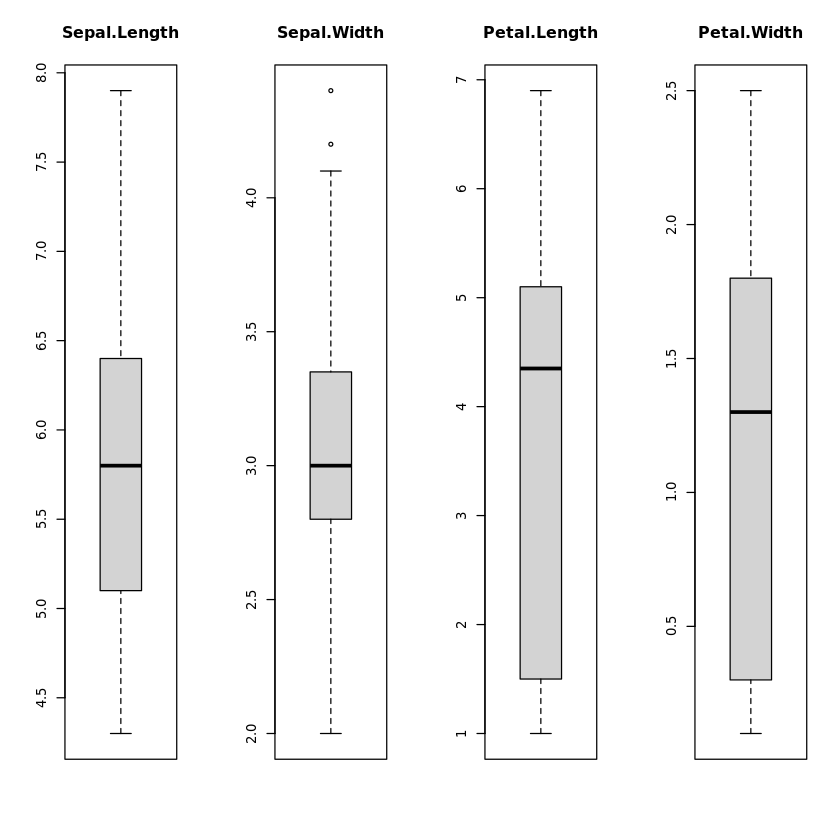

In [26]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

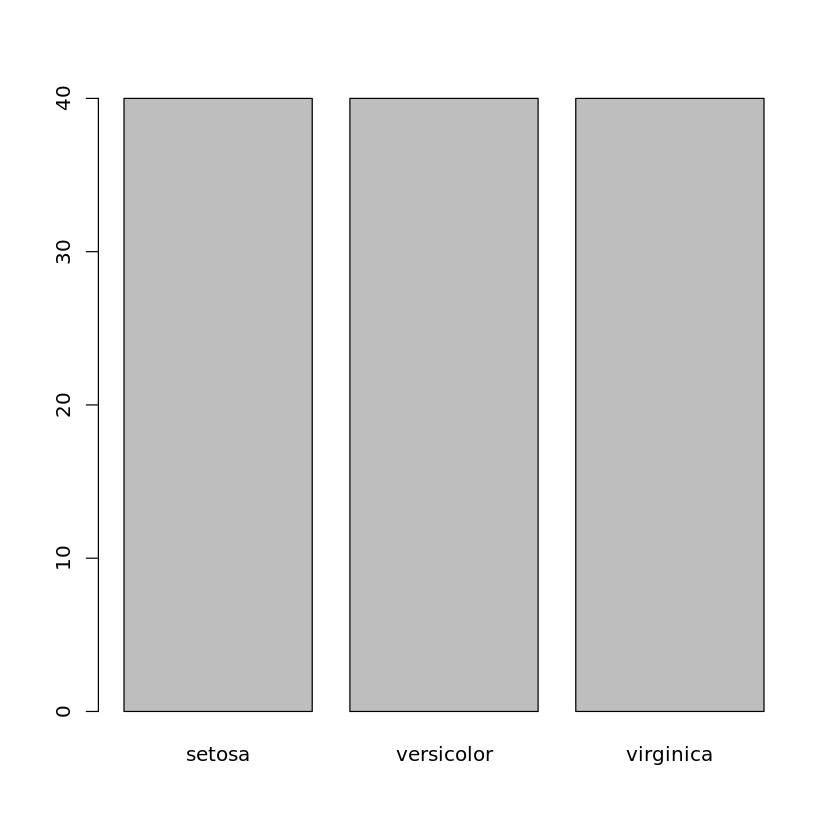

In [27]:
plot(y)

Now we are going to look at the interactions between the variables using multivariate plots 

In [29]:
library("kernlab")
library("randomForest")
library("ellipse")


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




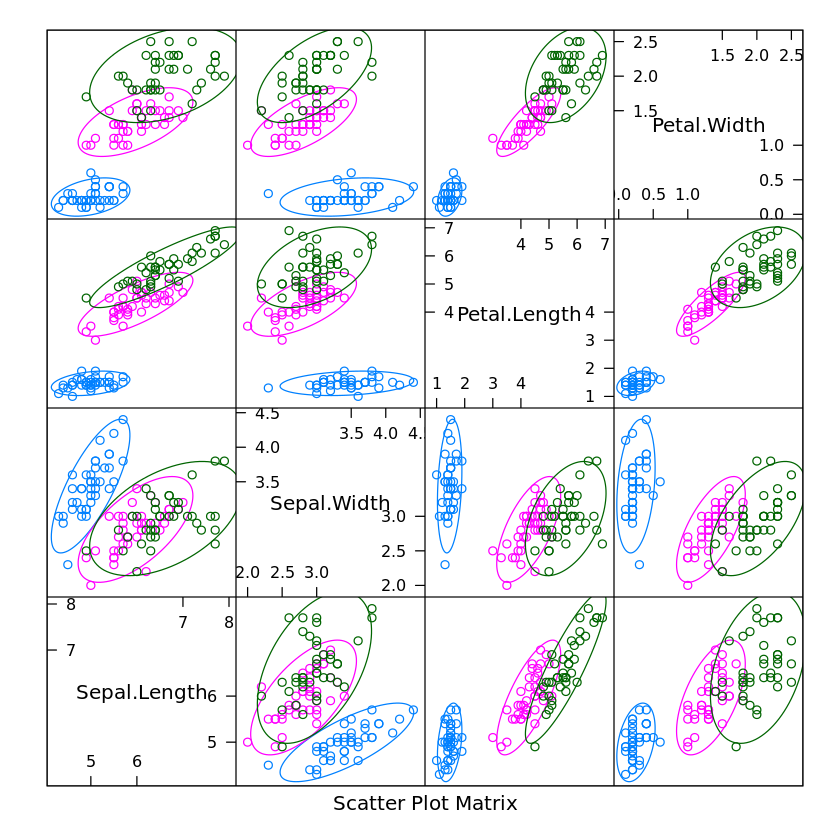

In [30]:
featurePlot(x=x, y=y, plot="ellipse")

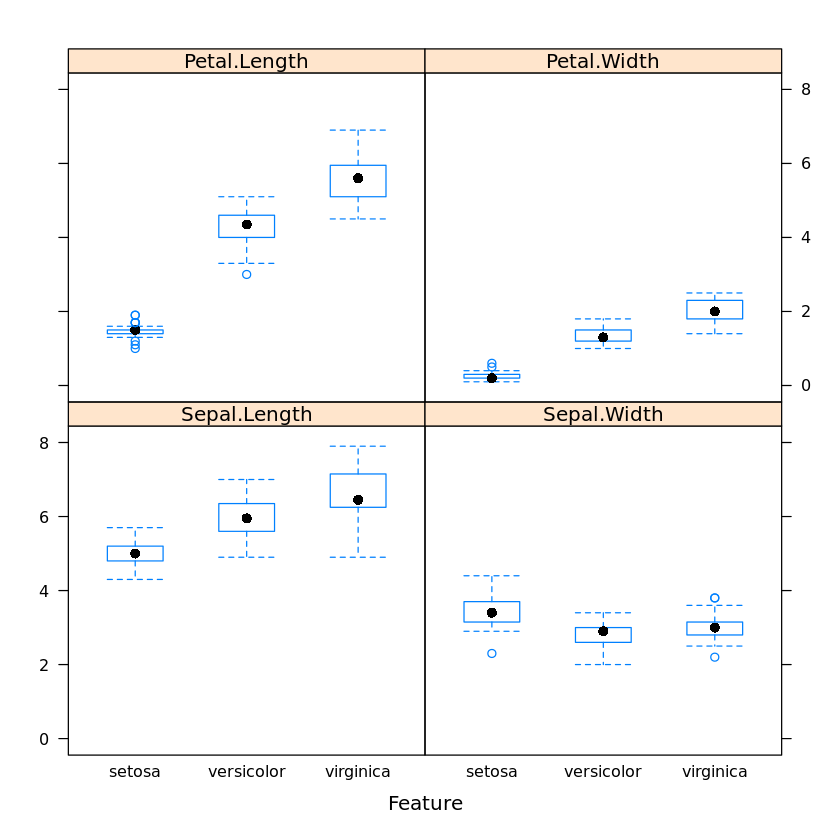

In [31]:
featurePlot(x=x, y=y, plot="box")

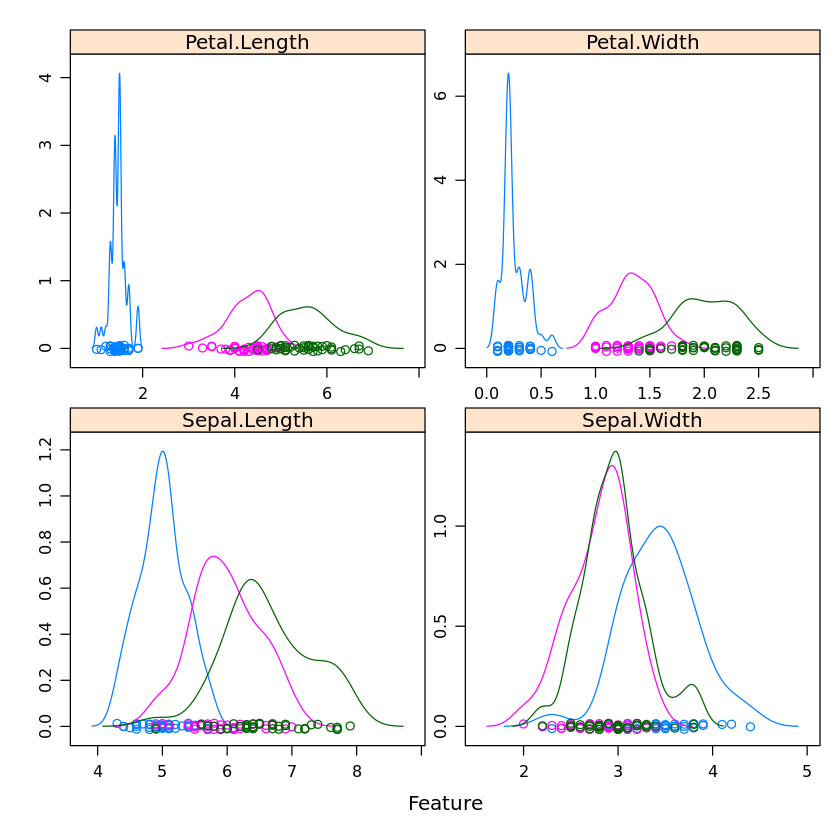

In [34]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

Now we are going to evalute some algorithms. We are going to set up the harness to use 10-fold cross validation, building 5 different models to predict species from flower measurements, and select the best model.

First we are going to create a 10-fold cross validation to estimate accuracy.

In [35]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

Next we are going to build 5 different algorithms; Linear Discriminant Analysis (LDA), classification and regression trees (CART), k-Nearest Neighbors (KNN), support vectors machines (SVM), and Random Forest (RF)

In [36]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

Now that we have built the models, we can compare the models and select the most accurate one.

In [37]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.8333333 1.0000000 1.0000000 0.9750000       1    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625 1.0000 0.9625       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.750 1.00000 1.0000 0.9625       1    1    0
svm  0.750 0.87500 0.9375 0.9250       1    1    0
rf   0.750 0.87500 0.9375 0.9250       1    1    0


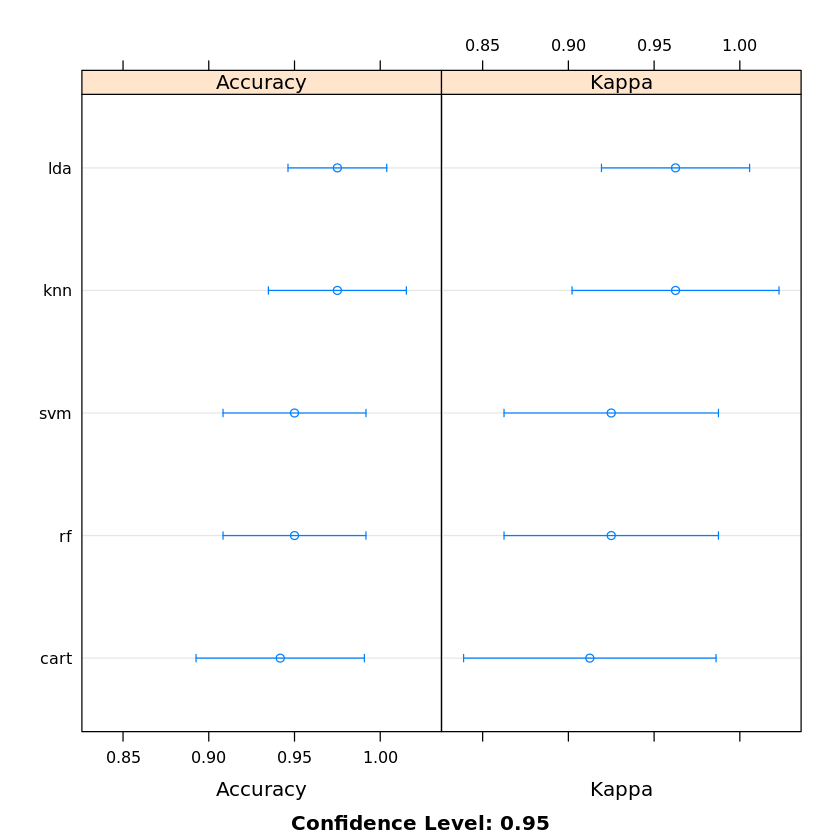

In [38]:
dotplot(results)

Since lda looks like the best model, we can just look at the summary results for LDA

In [39]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



Since LDA is the most accurate model, we can get an idea of accuracy using our validation set.

In [40]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            